# Smart Waste Classification System
**Machine Learning (BCS602)**  
 

**Submitted By:** Manjunath V Poojari  
**USN:** 4JN22CS077   
**Submitted To:** Mrs. Radhika S K  
 

**Dataset:** smart_waste_classification_hard.csv



## 1. Setup and Data Loading



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, precision_score, recall_score)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('smart_waste_classification_hard.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")


Dataset loaded successfully!
Shape: (150, 5)


## 2. Exploratory Data Analysis

In [3]:
df.head()

,id,image_name,waste_type,material,recyclable
0,1,plastic_1.jpg,Plastic,PET,Yes
1,2,metal_2.jpg,Metal,Copper,Yes
2,3,glass_3.jpg,Glass,Ceramic,No
3,4,other_4.jpg,Other,Fabric,No
4,5,paper_5.jpg,Paper,Newspaper,Yes


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          150 non-null    int64 
 1   image_name  150 non-null    object
 2   waste_type  150 non-null    object
 3   material    135 non-null    object
 4   recyclable  135 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.0+ KB


In [6]:
df.describe()

,id
count,150.000000
mean,75.500000
std,43.445368
min,1.000000
25%,38.250000
50%,75.500000
75%,112.750000
max,150.000000


In [7]:
df.nunique()

id            150
image_name    150
waste_type      7
material       32
recyclable      2
dtype: int64

In [8]:
df.isnull()

,id,image_name,waste_type,material,recyclable
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,True,False


In [9]:
df.isnull().sum()

id             0
image_name     0
waste_type     0
material      15
recyclable    15
dtype: int64

In [10]:
most_common_material = df['material'].mode()[0]
df['material'] = df['material'].fillna(most_common_material)

df['recyclable'] = df['recyclable'].fillna('Yes')


In [11]:
df.isnull().sum()

id            0
image_name    0
waste_type    0
material      0
recyclable    0
dtype: int64

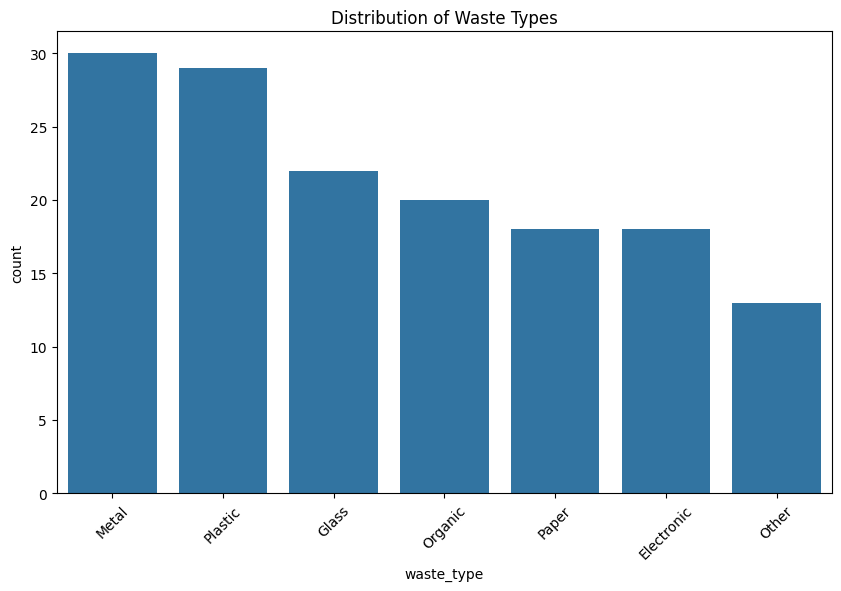

In [12]:
# Visualize waste type distribution

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='waste_type', order=df['waste_type'].value_counts().index)
plt.title('Distribution of Waste Types')
plt.xticks(rotation=45)
plt.show()

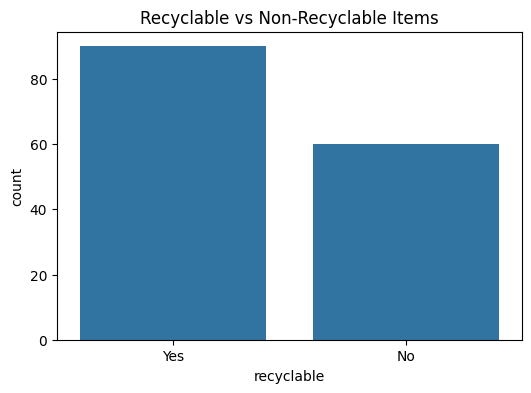

In [13]:
# Visualize recyclable vs non-recyclable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='recyclable')
plt.title('Recyclable vs Non-Recyclable Items')
plt.show()


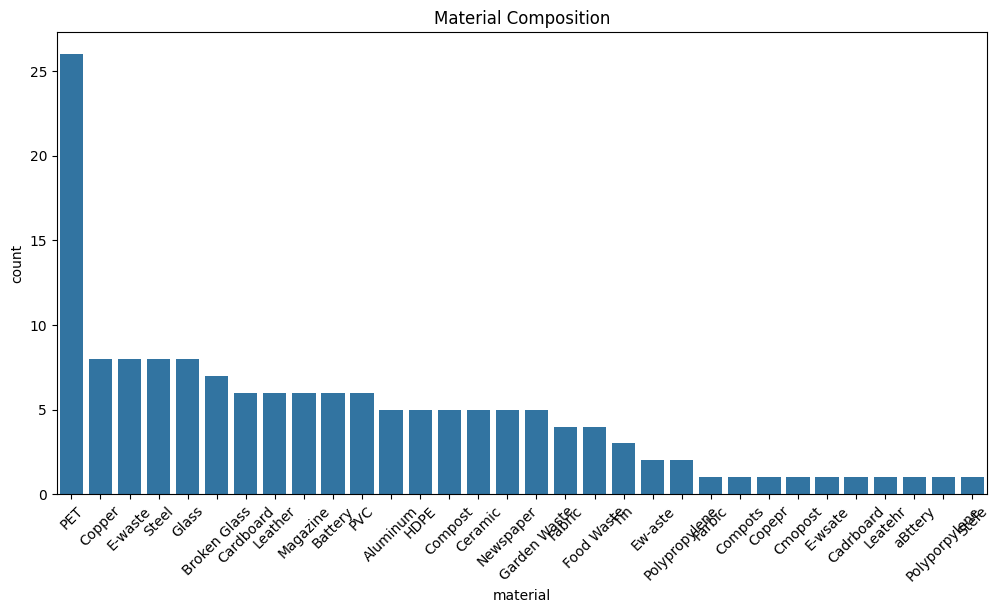

In [14]:
# Material composition
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='material', order=df['material'].value_counts().index)
plt.title('Material Composition')
plt.xticks(rotation=45)
plt.show()

## 3. Data Preprocessing


In [15]:
# Encode categorical features
le = LabelEncoder()
df['waste_type_encoded'] = le.fit_transform(df['waste_type'])
df['material_encoded'] = le.fit_transform(df['material'])
df['recyclable_encoded'] = le.fit_transform(df['recyclable'])

In [16]:
# Prepare features and target
X = df[['waste_type_encoded', 'material_encoded']]
y = df['recyclable_encoded']

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 120
Test set size: 30


## 4. Model Selection & Training

In [18]:
# Model 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Model 2: XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
# Model 3: Support Vector Machine
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

## 5. Model Evaluation

In [21]:
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Recyclable', 'Recyclable']))
    
    plt.figure(figsize=(6,4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Recyclable', 'Recyclable'],
                yticklabels=['Non-Recyclable', 'Recyclable'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Random Forest Performance:
Accuracy: 0.70
Precision: 0.80
Recall: 0.67

Classification Report:
                precision    recall  f1-score   support

Non-Recyclable       0.60      0.75      0.67        12
    Recyclable       0.80      0.67      0.73        18

      accuracy                           0.70        30
     macro avg       0.70      0.71      0.70        30
  weighted avg       0.72      0.70      0.70        30



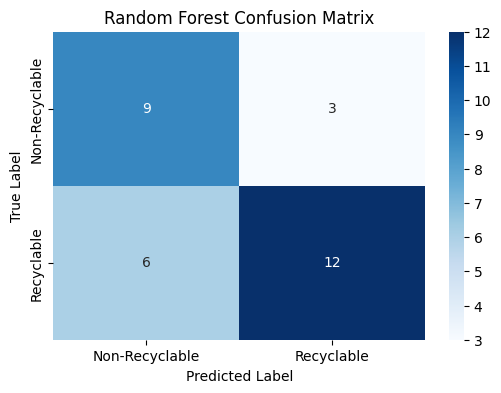

In [22]:
# Evaluate Random Forest
evaluate_model(rf, "Random Forest", X_test, y_test)


XGBoost Performance:
Accuracy: 0.80
Precision: 0.83
Recall: 0.83

Classification Report:
                precision    recall  f1-score   support

Non-Recyclable       0.75      0.75      0.75        12
    Recyclable       0.83      0.83      0.83        18

      accuracy                           0.80        30
     macro avg       0.79      0.79      0.79        30
  weighted avg       0.80      0.80      0.80        30



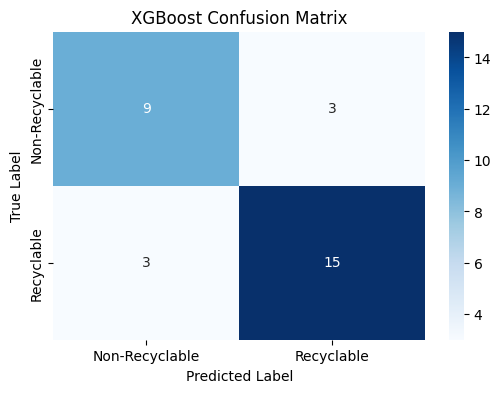

In [23]:
# Evaluate XGBoost
evaluate_model(xgb, "XGBoost", X_test, y_test)


Support Vector Machine Performance:
Accuracy: 0.63
Precision: 0.68
Recall: 0.72

Classification Report:
                precision    recall  f1-score   support

Non-Recyclable       0.55      0.50      0.52        12
    Recyclable       0.68      0.72      0.70        18

      accuracy                           0.63        30
     macro avg       0.61      0.61      0.61        30
  weighted avg       0.63      0.63      0.63        30



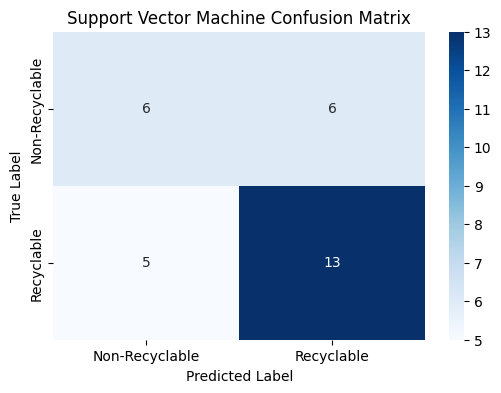

In [24]:
# Evaluate SVM
evaluate_model(svm, "Support Vector Machine", X_test, y_test)

## 6. Feature Importance

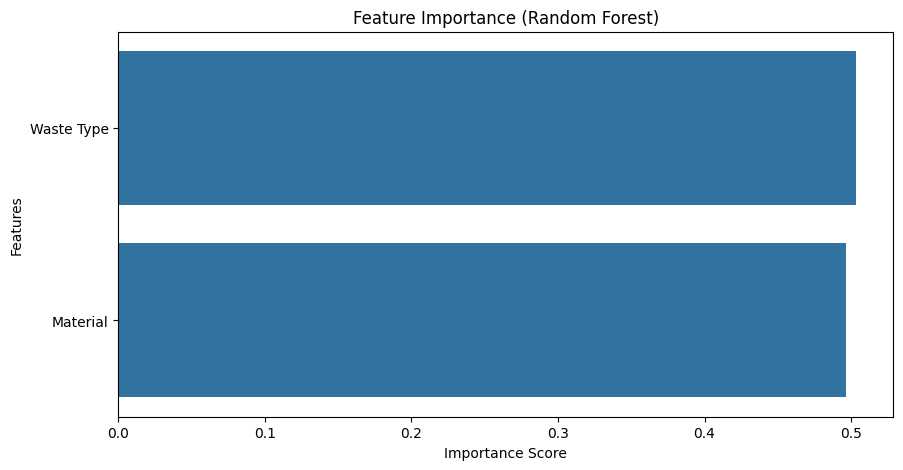

In [25]:
# Plot feature importance for Random Forest
plt.figure(figsize=(10,5))
feature_imp = pd.Series(rf.feature_importances_,
                        index=['Waste Type', 'Material']).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## 7. Results and Conclusion

In [26]:
# Create results comparison table
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Support Vector Machine'],
    'Accuracy': [
        accuracy_score(y_test, rf.predict(X_test)),
        accuracy_score(y_test, xgb.predict(X_test)),
        accuracy_score(y_test, svm.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, rf.predict(X_test)),
        precision_score(y_test, xgb.predict(X_test)),
        precision_score(y_test, svm.predict(X_test))
    ],
    'Recall': [
        recall_score(y_test, rf.predict(X_test)),
        recall_score(y_test, xgb.predict(X_test)),
        recall_score(y_test, svm.predict(X_test))
    ]
})

print("Model Performance Comparison:")
display(results.sort_values('Accuracy', ascending=False))

Model Performance Comparison:


,Model,Accuracy,Precision,Recall
1,XGBoost,0.800000,0.833333,0.833333
0,Random Forest,0.700000,0.800000,0.666667
2,Support Vector Machine,0.633333,0.684211,0.722222
